# Definition of quays polygons for Stockholm

In [20]:
from math import cos, sin, pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

#Definition of main quay polygon

#  
#    p3 ------ p2 \ 
#    |         |   }depth
#    |         |   /
#    p0 ------ p1 /

## Input section

In [21]:
#Position and heading of vessel center when docked (from autonomy config file)
p_docked_north = np.array([612.88, 138.02])
dir_docked_north = -3.1373

p_docked_south = np.array([87.50, 494.90])
dir_docked_south =  -0.09075 + pi

#Vessel dimensions
vessel_L = 12.2
vessel_B = 5.2

#Define quay geometries

#Origin of local quay coordinates is at p0 of the main quay polygon with x-axis pointing from p0 to p1 of the main quay
#and y-axis pointing in the direction of the outrigger

#North quay
#Main quay polygon
p0_north_main = np.array([0,0])
p1_north_main = np.array([12, 0])
depth_north_main = 4.8

#Outrigger polygon
p0_north_outrigger = np.array([5.1 + 0.5*(2.4-0.71), 12])
p1_north_outrigger = np.array([5.1 + 0.5*(2.4-0.71), 0])
depth_north_outrigger = 0.71

#South quay
#Main quay polygon
p0_south_main = np.array([0,0])
p1_south_main = np.array([9, 0])
depth_south_main = 4.8

#Outrigger polygon
p0_south_outrigger = np.array([0.5*(2.4-0.71), 12])
p1_south_outrigger = np.array([0.5*(2.4-0.71),0])
depth_south_outrigger = 0.71


NameError: name 'math' is not defined

Calculate quay polygons in NED frame

In [15]:
#Position vessel center i local quay frame when the vessel is docked 
p_vessel_center_north = p1_north_outrigger + np.array([vessel_B/2, vessel_L/2])
p_vessel_center_south = p1_south_outrigger + np.array([vessel_B/2, vessel_L/2])

#Angle of local quay frames relative to NED frames
dir_north_quay = dir_docked_north - pi/2
dir_south_quay = dir_docked_south + pi/2

#Rotation matrices for transforming between NED and local quay frames
R_north = np.array([(cos(dir_north_quay), -sin(dir_north_quay)), (sin(dir_north_quay), cos(dir_north_quay))])
R_south = np.array([(cos(dir_south_quay), -sin(dir_south_quay)), (sin(dir_south_quay), cos(dir_south_quay))])


#Position and orientation of local quay frames in NED frame
p_origin_north_quay = p_docked_north - R_north@p_vessel_center_north
p_origin_south_quay = p_docked_south - R_south@p_vessel_center_south

#Transform quay coordinates to NED frame
p0_north_main_ned = p_origin_north_quay + R_north@p0_north_main
p1_north_main_ned = p_origin_north_quay + R_north@p1_north_main
p2_north_main_ned = p_origin_north_quay + R_north@(p1_north_main + np.array([0.0, -depth_north_main]))
p3_north_main_ned = p_origin_north_quay + R_north@(p0_north_main + np.array([0.0, -depth_north_main]))

p0_north_outrigger_ned = p_origin_north_quay + R_north@p0_north_outrigger
p1_north_outrigger_ned = p_origin_north_quay + R_north@p1_north_outrigger
p2_north_outrigger_ned = p_origin_north_quay + R_north@(p1_north_outrigger + np.array([-depth_north_outrigger, 0.0]))
p3_north_outrigger_ned = p_origin_north_quay + R_north@(p0_north_outrigger + np.array([-depth_north_outrigger, 0.0]))

p0_south_main_ned = p_origin_south_quay + R_south@p0_south_main
p1_south_main_ned = p_origin_south_quay + R_south@p1_south_main
p2_south_main_ned = p_origin_south_quay + R_south@(p1_south_main + np.array([0.0, -depth_south_main]))
p3_south_main_ned = p_origin_south_quay + R_south@(p0_south_main + np.array([0.0, -depth_south_main]))

p0_south_outrigger_ned = p_origin_south_quay + R_south@p0_south_outrigger
p1_south_outrigger_ned = p_origin_south_quay + R_south@p1_south_outrigger
p2_south_outrigger_ned = p_origin_south_quay + R_south@(p1_south_outrigger + np.array([-depth_south_outrigger, 0.0]))
p3_south_outrigger_ned = p_origin_south_quay + R_south@(p0_south_outrigger + np.array([-depth_south_outrigger, 0.0]))

Draw quays for validation

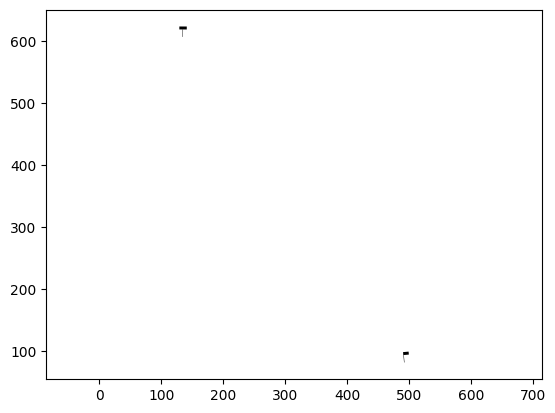

In [16]:
north_main_poly = Polygon(np.fliplr(np.array([p0_north_main_ned, p1_north_main_ned, p2_north_main_ned, p3_north_main_ned, p0_north_main_ned])), facecolor = 'k')
north_outrigger_poly = Polygon(np.fliplr(np.array([p0_north_outrigger_ned, p1_north_outrigger_ned, p2_north_outrigger_ned, p3_north_outrigger_ned, p0_north_outrigger_ned])), facecolor = 'k')

south_main_poly = Polygon(np.fliplr(np.array([p0_south_main_ned, p1_south_main_ned, p2_south_main_ned, p3_south_main_ned, p0_south_main_ned])), facecolor = 'k')
south_outrigger_poly = Polygon(np.fliplr(np.array([p0_south_outrigger_ned, p1_south_outrigger_ned, p2_south_outrigger_ned, p3_south_outrigger_ned, p0_south_outrigger_ned])), facecolor = 'k')

fig,ax = plt.subplots()
ax.add_patch(north_main_poly)
ax.add_patch(north_outrigger_poly)
ax.add_patch(south_main_poly)
ax.add_patch(south_outrigger_poly)
ax.set_xlim([0, 500])
ax.set_ylim([0,650])
ax.axis('equal')
plt.show()

Print coordinates output needed for OSPSystemStructure

In [17]:
print('South p0 main: {}\nSouth p1 main: {}\nSouth p0 outrigger:{}\nSouth p1 outrigger:{}'.format(p0_south_main_ned, p1_south_main_ned, p0_south_outrigger_ned, p1_south_outrigger_ned))
print('North p0 main: {}\nNorth p1 main: {}\nNorth p0 outrigger:{}\nNorth p1 outrigger:{}'.format(p0_north_main_ned, p1_north_main_ned, p0_north_outrigger_ned, p1_north_outrigger_ned))

South p0 main: [ 93.26269396 490.91636054]
South p1 main: [ 94.07832336 499.87932594]
South p0 outrigger:[ 81.38865197 492.84538927]
South p1 outrigger:[ 93.3392725  491.75788341]
North p0 main: [619.01662441 129.30126384]
North p1 main: [618.96511273 141.30115327]
North p0 outrigger:[606.99121522 135.19469738]
North p1 outrigger:[618.99110466 135.24620906]


Generate XML output for copying into OspSystemStructure.xml

In [18]:
print('<!-- South quay main block -->')
print('<InitialValue variable="quay_1_en"><Boolean value="true"/></InitialValue>')
print('<InitialValue variable="quay_1_p0[1]"><Real value="{0}"/></InitialValue>'.format(p0_south_main_ned[0]))
print('<InitialValue variable="quay_1_p0[2]"><Real value="{0}"/></InitialValue>'.format(p0_south_main_ned[1]))
print('<InitialValue variable="quay_1_p1[1]"><Real value="{0}"/></InitialValue>'.format(p1_south_main_ned[0]))
print('<InitialValue variable="quay_1_p1[2]"><Real value="{0}"/></InitialValue>'.format(p1_south_main_ned[1]))
print('<InitialValue variable="quay_1_depth"><Real value="{0}"/></InitialValue>'.format(depth_south_main))

print('<!-- South quay outrigger -->')
print('<InitialValue variable="quay_2_en"><Boolean value="true"/></InitialValue>')
print('<InitialValue variable="quay_2_p0[1]"><Real value="{0}"/></InitialValue>'.format(p0_south_outrigger_ned[0]))
print('<InitialValue variable="quay_2_p0[2]"><Real value="{0}"/></InitialValue>'.format(p0_south_outrigger_ned[1]))
print('<InitialValue variable="quay_2_p1[1]"><Real value="{0}"/></InitialValue>'.format(p1_south_outrigger_ned[0]))
print('<InitialValue variable="quay_2_p1[2]"><Real value="{0}"/></InitialValue>'.format(p1_south_outrigger_ned[1]))
print('<InitialValue variable="quay_2_depth"><Real value="{0}"/></InitialValue>'.format(depth_south_outrigger))

print('<!-- North quay main block -->')
print('<InitialValue variable="quay_3_en"><Boolean value="true"/></InitialValue>')
print('<InitialValue variable="quay_3_p0[1]"><Real value="{0}"/></InitialValue>'.format(p0_north_main_ned[0]))
print('<InitialValue variable="quay_3_p0[2]"><Real value="{0}"/></InitialValue>'.format(p0_north_main_ned[1]))
print('<InitialValue variable="quay_3_p1[1]"><Real value="{0}"/></InitialValue>'.format(p1_north_main_ned[0]))
print('<InitialValue variable="quay_3_p1[2]"><Real value="{0}"/></InitialValue>'.format(p1_north_main_ned[1]))
print('<InitialValue variable="quay_3_depth"><Real value="{0}"/></InitialValue>'.format(depth_north_main))

print('<!-- North quay outrigger -->')
print('<InitialValue variable="quay_4_en"><Boolean value="true"/></InitialValue>')
print('<InitialValue variable="quay_4_p0[1]"><Real value="{0}"/></InitialValue>'.format(p0_north_outrigger_ned[0]))
print('<InitialValue variable="quay_4_p0[2]"><Real value="{0}"/></InitialValue>'.format(p0_north_outrigger_ned[1]))
print('<InitialValue variable="quay_4_p1[1]"><Real value="{0}"/></InitialValue>'.format(p1_north_outrigger_ned[0]))
print('<InitialValue variable="quay_4_p1[2]"><Real value="{0}"/></InitialValue>'.format(p1_north_outrigger_ned[1]))
print('<InitialValue variable="quay_4_depth"><Real value="{0}"/></InitialValue>'.format(depth_north_outrigger))


<!-- South quay main block -->
<InitialValue variable="quay_1_en"><Boolean value="true"/></InitialValue>
<InitialValue variable="quay_1_p0[1]"><Real value="93.26269396083187"/></InitialValue>
<InitialValue variable="quay_1_p0[2]"><Real value="490.91636054420184"/></InitialValue>
<InitialValue variable="quay_1_p1[1]"><Real value="94.07832335642648"/></InitialValue>
<InitialValue variable="quay_1_p1[2]"><Real value="499.87932594015433"/></InitialValue>
<InitialValue variable="quay_1_depth"><Real value="4.8"/></InitialValue>
<!-- South quay outrigger -->
<InitialValue variable="quay_2_en"><Boolean value="true"/></InitialValue>
<InitialValue variable="quay_2_p0[1]"><Real value="81.38865197059269"/></InitialValue>
<InitialValue variable="quay_2_p0[2]"><Real value="492.8453892671702"/></InitialValue>
<InitialValue variable="quay_2_p1[1]"><Real value="93.33927249852937"/></InitialValue>
<InitialValue variable="quay_2_p1[2]"><Real value="491.7578834063774"/></InitialValue>
<InitialValue variab